<a href="https://colab.research.google.com/github/maxbentley/datasciencefund/blob/main/Max_Bentley_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

**Answer1**:

Nope! elpd_loo values only work as a tool of comparison.

**Task2**:

Describe overfitting, in the context of this course

**Answer2**:

Overfitting means that your model is matching the data too much to answer the question well--it recognizes and uses additional, unrelated patterns that emerge in the data, harming its ability to model the scenario well.

**Task3**:

How do we mitigate overfitting?

**Answer3**:

Overfitting can be mitigated through not selecting too many variables that influence the data or each other.

**Task4**:

How do we mitigate underfitting?

**Answer4**:

Underfitting can be mitigated by selecting models that perform well and capture the desired patterns in the data.

**Task5**:

Why would we want more than one predictor in a model?

**Answer5**:

If one predictor only really covers one case, but the predicted covers multiple cases, then other predictors that can match those other cases would be useful.

**Task6**:

Can we have too many predictors? How would we now?

**Answer6**:

You can have too many predictors! Different predictors can influence each other, which will diminish the effectiveness of the model, as the model will waste unnecessary energy matching patterns that are nonsensical. We'd know whether or not we have too many predictors if the elpd_loo of a model with a large number of variables is less positive than the elpd_loo of a model with a smaller number of variables.

**Task7**:

What is variable selection, and how does it work?

**Answer7**:

Variable selection is the process of deciding which predictors to include in a model. The best practice is to choose the least amount of relevant variables that predicts the observed data the best. For example, a model that uses two variables and matches the observed data very well would be better than a model that uses three variables but only improves upon the other model slightly.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Answer8:**

All three of the models would incorporate the two variables: the categorical predictor and the non-categorical predictor.
Adding the variables would separate the predictor by category while visualising the model with the same slope for each category (as the model would consider all data the same), while using it as a hierarchy would separate the predictor by category and run different regressions for each, assuing that the cateogrical variable impacts the quantitative variable. Adding the two variables and using the categorical interaction on the other will assume that both of the variables impact the predicted and are connected in some way. Crucially, whether the categorical impacts the quantitative or vice versa is not assumed.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

**Answer9**:

Unfortunately, we cannot do it all at once using one graph. We can create graphs separated by values of different categories to see the impact of other variables

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
# Improt Vairbales (i made this code block)

import pandas as pd
!pip install bambi
import bambi as bmb
import arviz as az

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Analysis

In [ ]:
# ft + position (separation)
model_ftps = bmb.Model("FGp ~ FTp + Pos", data=bb)
idata_ftps = model_ftps.fit(idata_kwargs={'log_likelihood': True})

# ft + position (hierarchical)
model_ftph = bmb.Model("FGp ~ FTp|Pos", data=bb)
idata_ftph = model_ftph.fit(idata_kwargs={'log_likelihood': True})

# ft + position (interaction)
model_ftpi = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
idata_ftpi = model_ftpi.fit(idata_kwargs={'log_likelihood': True})

# ft, 3pa, pos (3pt-Pos interaction)
model_ft3p1 = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", data=bb)
idata_ft3p1 = model_ft3p1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
# ft, 3pa, pos (all interactions)
model_ft3pa = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:`3PA` + `3PA`:Pos + FTp:`3PA`", data=bb)
idata_ft3pa = model_ft3pa.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

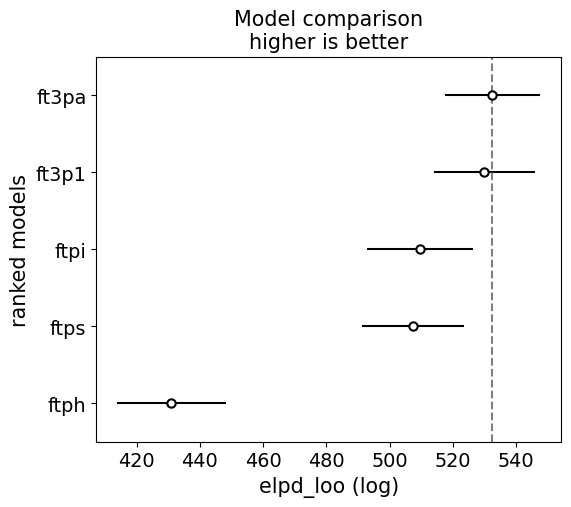

In [ ]:
# comparison
model_compare = az.compare({"ftps":idata_ftps, "ftph":idata_ftph, "ftpi":idata_ftpi, "ft3pa":idata_ft3pa, "ft3p1":idata_ft3p1})
az.plot_compare(model_compare)

In [ ]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
ft3pa,0,532.515958,14.248363,0.000000,6.380303e-01,15.079991,0.000000,False,log
ft3p1,1,529.966919,12.629727,2.549039,3.114875e-01,15.894170,3.306534,False,log
ftpi,2,509.564236,13.562817,22.951722,1.387547e-11,16.743126,6.978613,False,log
ftps,3,507.366980,8.300459,25.148978,1.398273e-11,16.105481,7.123357,False,log
ftph,4,431.038063,4.290226,101.477895,5.048213e-02,17.136766,15.635669,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

It seems as though the best model is the model that includes all three variables and makes the most connections between variables (in this as "ft3pa"). I, having some previous knowledge on basketball, know that position impacts both three point attempts and free throw percentage, as different positions emphasize shooting ability (which correlates positively with 3PA and FT%), and so letting the model know that position is related to everything lets the model make more sense of the data.